In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pickle
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

with open("/tmp/sarcasm.json", 'r') as file:
    dataset = json.load(file)

--2020-11-17 00:16:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.15.112, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2020-11-17 00:16:59 (261 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
# fungsi untuk cek performa

import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
dataset[0]

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
 'is_sarcastic': 0}

In [ ]:
len(dataset)

26709

In [ ]:
sentences = []
labels = []
urls = []
for item in dataset:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
#Nanti make cross validation

training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)

In [ ]:
#word_index = tokenizer.word_index
#word_index
pickle.dump(tokenizer, open('/content/drive/My Drive/tranform.pkl', 'wb'))

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
print(training_sentences[0])
print(training_sequences[0])

former versace store clerk sues over secret 'black code' for minority shoppers
[328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863]


In [ ]:
tokenizer.texts_to_sequences(['I love you'])  # kalo gak ada di kamus auto 1 (out of vocab)

[[88, 137, 18]]

In [ ]:
# padding kalimat

training_padded = pad_sequences(training_sequences, maxlen=20, padding='post', truncating='post')
training_padded[0]

array([ 328,    1,  799, 3405, 2404,   47,  389, 2214,    1,    6, 2614,
       8863,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=20, padding='post', truncating='post')

In [ ]:
# convert ke bentuk numpy agar bisa diproses model tensorflow

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Modeling LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=20),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 50

#ubah ukuran batch

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
625/625 [==============================] - 5s 9ms/step - loss: 0.4147 - accuracy: 0.7922 - val_loss: 0.3345 - val_accuracy: 0.8569
Epoch 2/50
625/625 [==============================] - 5s 8ms/step - loss: 0.2275 - accuracy: 0.9060 - val_loss: 0.3394 - val_accuracy: 0.8556
Epoch 3/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1612 - accuracy: 0.9387 - val_loss: 0.4132 - val_accuracy: 0.8484
Epoch 4/50
625/625 [==============================] - 5s 8ms/step - loss: 0.1185 - accuracy: 0.9573 - val_loss: 0.4611 - val_accuracy: 0.8460
Epoch 5/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0834 - accuracy: 0.9701 - val_loss: 0.5303 - val_accuracy: 0.8419
Epoch 6/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0565 - accuracy: 0.9815 - val_loss: 0.5679 - val_accuracy: 0.8368
Epoch 7/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0402 - accuracy: 0.9865 - val_loss: 0.6581 - val_accuracy: 0.8395
Epoch 

In [ ]:
model.save("LSTM_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
LSTM = load_model('LSTM_model.h5')

In [ ]:
sentence = 'I love those mustard stains on your oversized hoodie. They really bring out the color in your eyes'
str(sentence)
sarcasm = 'yes'

if sarcasm == 'yes':
    labels = int(1)
else:
    labels = int(0)
word_tokenize = tokenizer.texts_to_sequences([sentence])
inputtext = pad_sequences(word_tokenize, maxlen=20, padding='post', truncating='post')
inputtext = np.array(inputtext)


In [ ]:
training_padded[0]

array([ 328,    1,  799, 3405, 2404,   47,  389, 2214,    1,    6, 2614,
       8863,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
training_labels

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
inputtext

array([[  88,  137,  532,    1,    1,    8,   31,    1,    1,   94,  118,
         776,   24,    4, 1049,    5,   31,  910,    0,    0]],
      dtype=int32)

In [ ]:
np.array([labels])

array([1])

In [ ]:
LSTM.fit(inputtext, np.array([labels]))

1/1 [==============================] - 0s 2ms/step - loss: 24.6360 - accuracy: 0.0000e+00


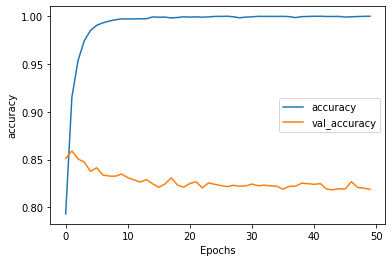

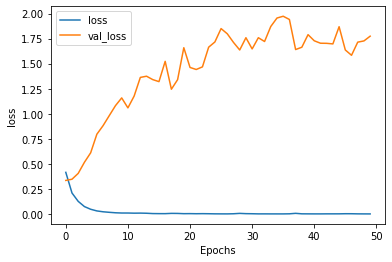

In [ ]:
# cek performa

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

# Modeling GRU

In [ ]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=20),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 50
history2 = model_gru.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#filename = 'GRU_model.pkl'
#pickle.dump(model_gru, open(filename, 'wb'))

Epoch 1/50
625/625 [==============================] - 9s 14ms/step - loss: 0.4103 - accuracy: 0.7998 - val_loss: 0.3798 - val_accuracy: 0.8284
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 0.2117 - accuracy: 0.9139 - val_loss: 0.3377 - val_accuracy: 0.8557
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 0.1259 - accuracy: 0.9525 - val_loss: 0.4167 - val_accuracy: 0.8545
Epoch 4/50
625/625 [==============================] - 8s 14ms/step - loss: 0.0767 - accuracy: 0.9737 - val_loss: 0.5100 - val_accuracy: 0.8466
Epoch 5/50
625/625 [==============================] - 9s 14ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.6304 - val_accuracy: 0.8427
Epoch 6/50
625/625 [==============================] - 9s 15ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.8096 - val_accuracy: 0.8353
Epoch 7/50
625/625 [==============================] - 8s 12ms/step - loss: 0.0207 - accuracy: 0.9941 - val_loss: 0.7609 - val_accuracy: 0.8360

In [ ]:
model_gru.save("GRU_model.h5")

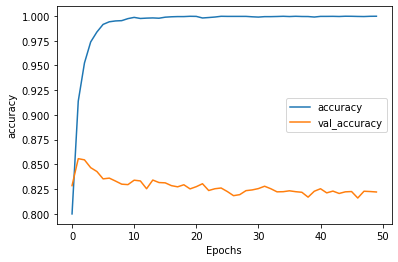

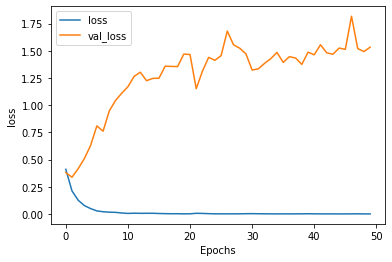

In [ ]:
# cek performa

plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

## Modeling CNN

In [ ]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=20),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model_cnn.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

#filename = 'CNN_model.pkl'
#pickle.dump(model_cnn, open(filename, 'wb'))

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 0.4479 - accuracy: 0.7772 - val_loss: 0.3538 - val_accuracy: 0.8456
Epoch 2/50
625/625 [==============================] - 4s 6ms/step - loss: 0.2432 - accuracy: 0.8982 - val_loss: 0.3521 - val_accuracy: 0.8533
Epoch 3/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1688 - accuracy: 0.9358 - val_loss: 0.3979 - val_accuracy: 0.8460
Epoch 4/50
625/625 [==============================] - 4s 6ms/step - loss: 0.1173 - accuracy: 0.9571 - val_loss: 0.4529 - val_accuracy: 0.8404
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.0764 - accuracy: 0.9746 - val_loss: 0.5461 - val_accuracy: 0.8374
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.0497 - accuracy: 0.9837 - val_loss: 0.6664 - val_accuracy: 0.8317
Epoch 7/50
625/625 [==============================] - 4s 6ms/step - loss: 0.0301 - accuracy: 0.9913 - val_loss: 0.7660 - val_accuracy: 0.8310
Epoch 

In [ ]:
model_cnn.save("CNN_model.h5")

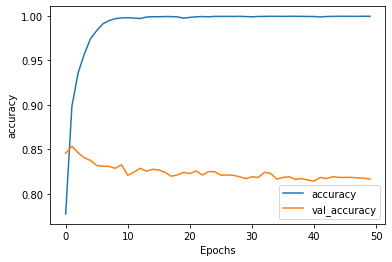

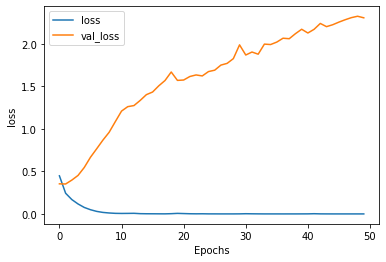

In [ ]:
# cek performa

plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')

In [ ]:
#check
kalimat = "I love you dude"
word_tokenize = tokenizer.texts_to_sequences([kalimat])
input = pad_sequences(word_tokenize, maxlen=20, padding='post', truncating='post')
input = np.array(input)
value = model.predict(input)[0][0]*100
statement = str('Tingkat sarkasme '+"{:.2f}".format(value)+'%')

if value>50:
  print('Termasuk kalimat sarkas,', statement)
else:
  print('Bukan kalimat sarkas,', statement)

Bukan kalimat sarkas, Tingkat sarkasme 0.00%


In [ ]:
#dataset[-100:]

In [ ]:
word_tokenize

[[88, 137, 18, 4173]]